In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
colors = ["#e7298a", "#1b9e77", "#d95f02", "#7570b3"]

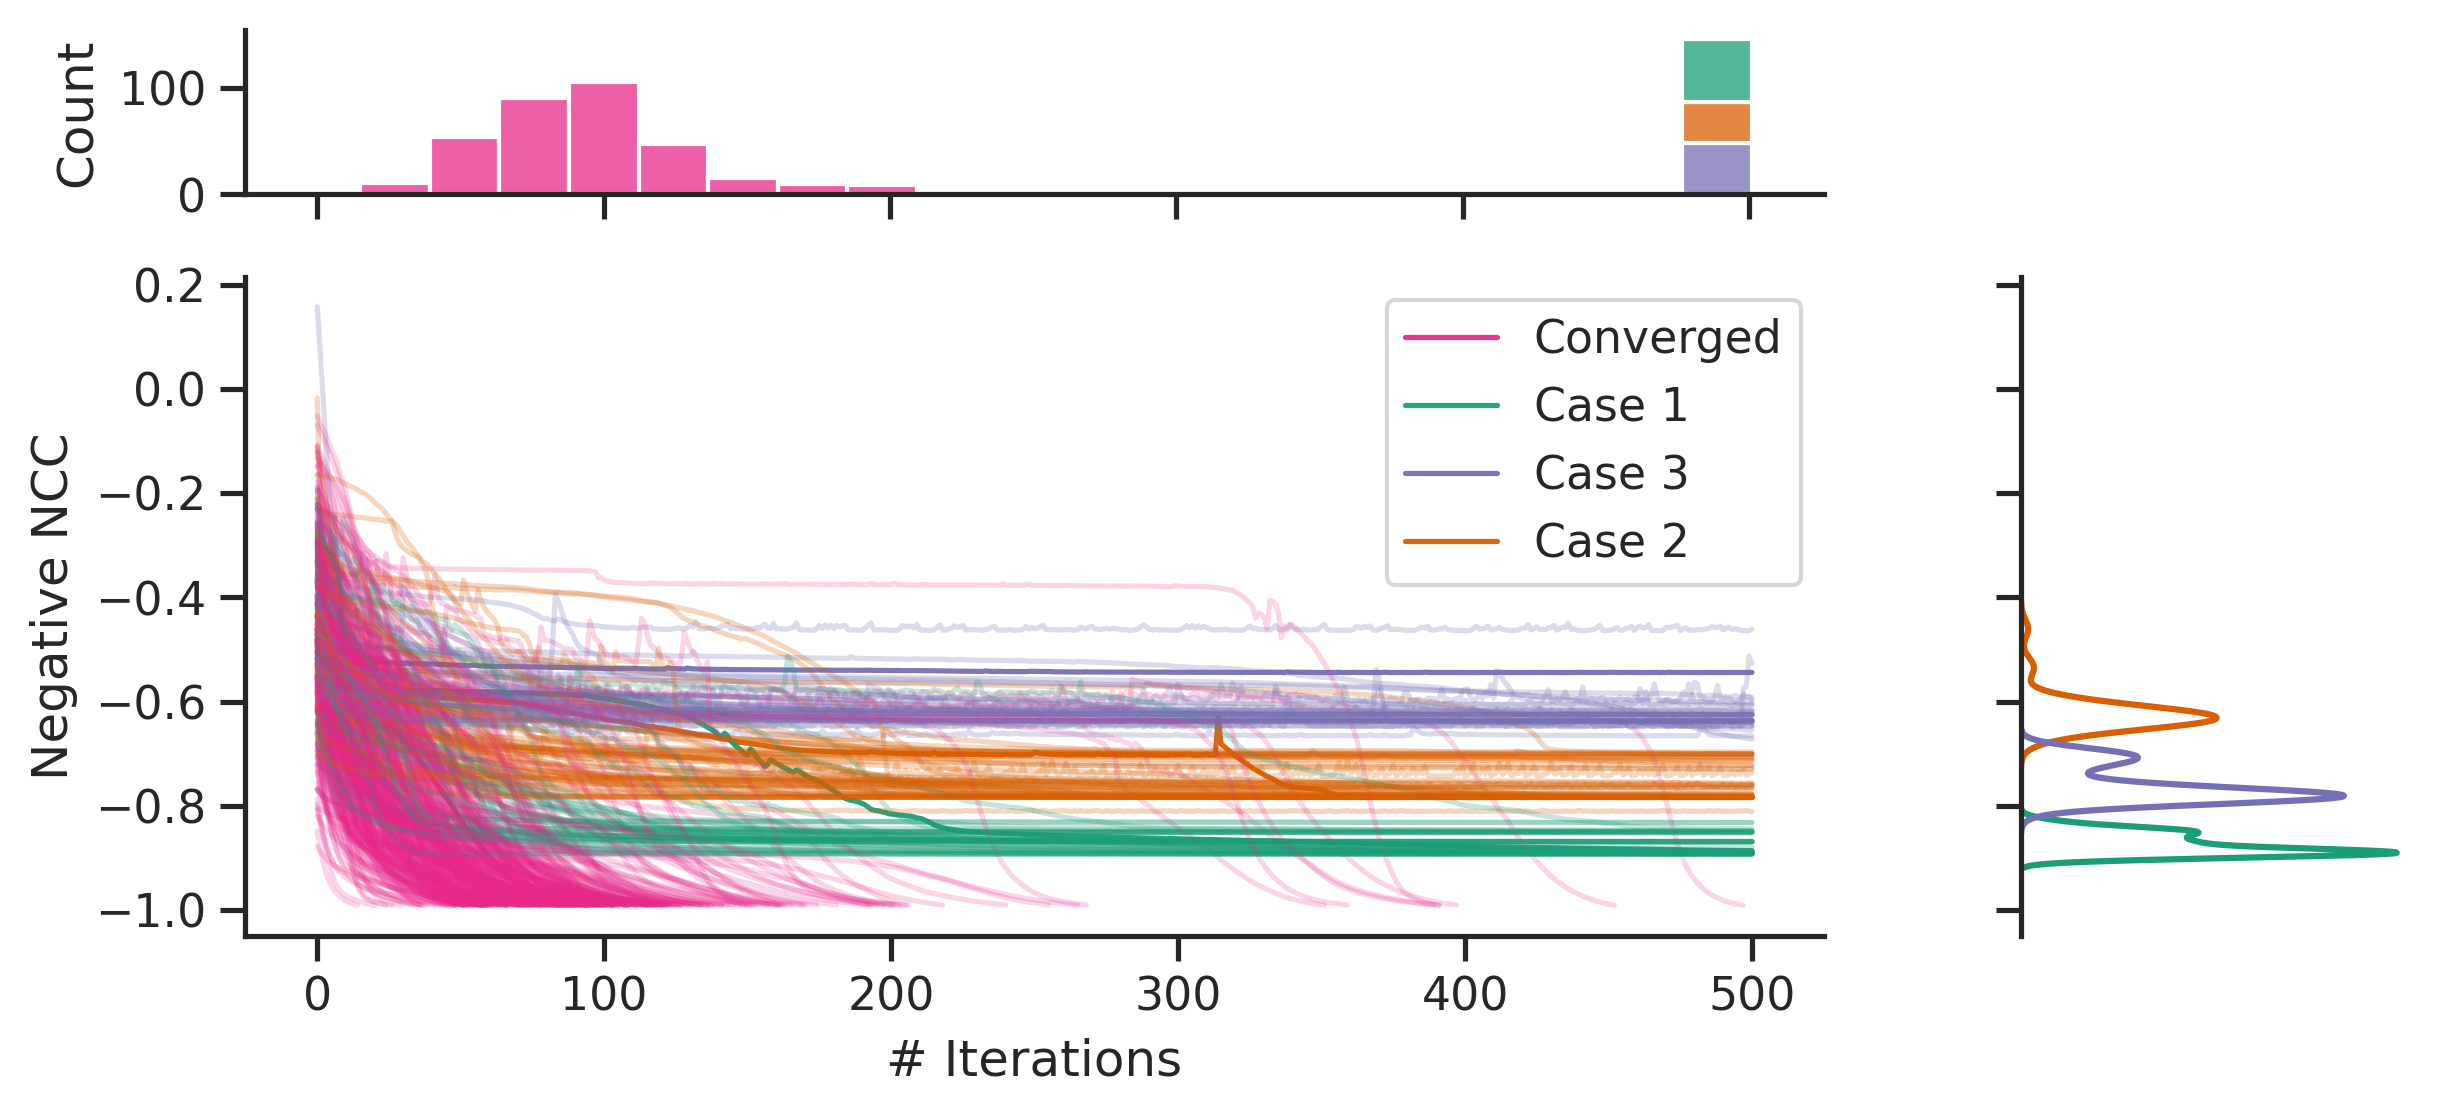

In [19]:
fig = plt.figure(dpi=300, figsize=plt.figaspect(6/14))

gs = gridspec.GridSpec(
    2, 2,
    width_ratios=[4, 1],
    height_ratios=[1, 4],
    figure=fig
)
ax1 = plt.subplot(gs[0], sharex=ax3)
ax4 = plt.subplot(gs[3], sharey=ax3)
ax3 = plt.subplot(gs[2])


csvs = Path("../results/grad_desc/").glob("*.csv")
conv = 0
nconv = 0
output = []

### Plot the training curves
new_1 = True
new_2 = True
new_3 = True
new_4 = True
for csv in csvs:
    df = pd.read_csv(csv, comment="#")
    initial_loss = df["loss"].iloc[0]
    # if initial_loss < -0.5:
        # continue
    final_loss = df["loss"].iloc[-1]
    n = len(df)
    converged = True if n < 500 else False
    alpha = 0.25
    lw = 1.25
    if final_loss <= -0.99:
        label = "Converged"
        ax3.plot(df["itr"], df["loss"], alpha=0.95 if new_1 else 0.2, lw=lw, c=colors[0], label=label if new_1 else None)
        new_1 = False
    elif final_loss > -.99 and final_loss <= -.82:
        label="Case 1"
        ax3.plot(df["itr"], df["loss"], alpha=0.95 if new_2 else alpha, lw=lw, c=colors[1], label=label if new_2 else None)
        new_2 = False
    elif final_loss > -.82 and final_loss <= -.69:
        label="Case 2"
        ax3.plot(df["itr"], df["loss"], alpha=0.95 if new_3 else alpha, lw=lw, c=colors[2], label=label if new_3 else None)
        new_3 = False
    else:
        label="Case 3"
        ax3.plot(df["itr"], df["loss"], alpha=0.95 if new_4 else alpha, lw=lw, c=colors[3], label=label if new_4 else None)
        new_4 = False
    if converged:
        conv += 1
    else:
        nconv += 1
    output.append([converged, label, n, final_loss, csv])
    ax3.set(xlabel="# Iterations", ylabel="Negative NCC")
ax3.legend()

### Plot the number of iterations
df = pd.DataFrame(output, columns=["converged", "case", "n_iters", "final_loss", "filename"])
sns.histplot(data=df, x="n_iters", palette=colors, hue="case", legend=False, ax=ax1, bins=20, multiple="stack")
# ax1.spines['left'].set_visible(False)
# ax1.get_yaxis().set_visible(False)
ax1.set(xlabel="")
ax1.set(xticklabels=[])

### Plot the last losses
sns.kdeplot(data=df.query("converged==False"), y="final_loss", hue="case", palette=colors[1:][::-1], ax=ax4, legend=False)
ax4.spines['bottom'].set_visible(False)
ax4.get_xaxis().set_visible(False)
ax4.set(ylabel="")
ax4.set(yticklabels=[])


#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [0, 3, 2, 1]
#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.savefig("../figures/optimization.pdf", bbox_inches="tight")
plt.show()

In [20]:
df.head()

,converged,case,n_iters,final_loss,filename
0,True,Converged,95,-0.990341,../results/grad_desc/393.csv
1,True,Converged,116,-0.990519,../results/grad_desc/434.csv
2,False,Case 2,501,-0.783362,../results/grad_desc/342.csv
3,False,Case 3,501,-0.543917,../results/grad_desc/266.csv
4,False,Case 3,501,-0.592036,../results/grad_desc/67.csv


In [23]:
with open("../results/grad_desc/393.csv", "r") as f:
    params = f.readline()[2:-2]
    

In [24]:
params

'2.9105821561186356,-0.5932139243128414,0.9902556093588615,205.31816810706698,151.85014301151756,170.2383058596573'